In [2]:
from pylab import rand, plot, show, norm

In [15]:
class Perceptron:
    def __init__(self):
        """ perceptron initialization """
        self.w = rand(2)*2 - 1  # Weights
        self.learningRate = 0.1
        
    def response(self, x):
        """ perceptron output """
        y = x[0]*self.w[0]+x[1]*self.w[1]  # dot product between x and w
        if y >= 0:
            return 1
        else:
            return -1
        
    def updateWeights(self, x, iterError):
        """
        updates the weights status, w at time t+1 is 
            w(t+1) = w(t) + learningRate * (d-r) * x
            where d is desired output and r is the perceptron response
            iterError is (d-r)
        """
        self.w[0] += self.learningRate * iterError * x[0]
        self.w[1] += self.learningRate * iterError * x[1]
        
    def train(self, data):
        """
        train all the vectors in data
        Every vector in data must have three elements,
        the third element (x[2]) must be the label (desired output)
        """
        learned = False
        iteration = 0
        while not learned:
            globalError = 0.0
            for x in data:
                r = self.response(x)
                if x[2] != r:  # if we have a wrong response
                    iterError = x[2] - r # desired response - actual response
                    self.updateWeights(x, iterError)
                    globalError += abs(iterError)
                iteration += 1
            if globalError == 0.0 or iteration >= 100:
                print("iterations", iteration)
                print("globalError", globalError)
                learned = True # Stop learning

In [4]:
def generateData(n):
    """
    generate a 2D linearly separable dataset with n samples
    The third element of the sample is the label
    """
    xb = (rand(n)*2-1) / 2 - 0.5
    yb = (rand(n)*2-1) / 2 + 0.5
    xr = (rand(n)*2-1) / 2 + 0.5
    yr = (rand(n)*2-1) / 2 - 0.5
    
    inputs = []
    for i in range(len(xb)):
        inputs.append([xb[i], yb[i], 1])
        inputs.append([xr[i], yr[i], -1])
    return inputs

iterations 120
globalError 0.0


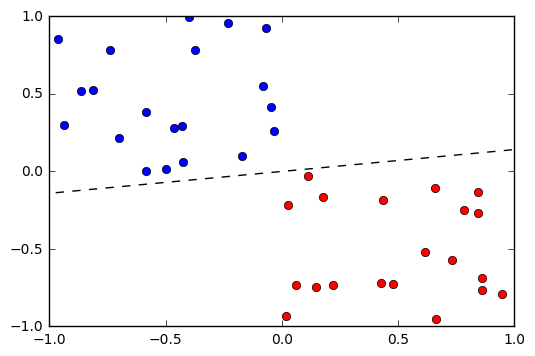

In [19]:
trainset = generateData(30) # train set generation
perceptron = Perceptron()   # perceptron instance
perceptron.train(trainset)  # training
testset = generateData(20)  # test set generation

# Perceptron test
for x in testset:
 r = perceptron.response(x)
 if r != x[2]: # if the response is not correct
  print('error')
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

# plot of the separation line.
# The separation line is orthogonal to w
n = norm(perceptron.w)
ww = perceptron.w/n
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
show()

In [14]:
trainset
testset

[[-0.93190917685962826, 0.27776873231376464, 1],
 [0.62992605660908052, -0.014919558433341917, -1],
 [-0.26182455649210057, 0.4485850495635465, 1],
 [0.012480898431398879, -0.35010195697576774, -1],
 [-0.21598953442792712, 0.81552053950669712, 1],
 [0.30660696689956768, -0.54855499631036486, -1],
 [-0.25638378710873033, 0.62268309218588969, 1],
 [0.37605533316394524, -0.096529306831047546, -1],
 [-0.76439818738004661, 0.86681306884561715, 1],
 [0.19813408102815999, -0.7630952915154906, -1],
 [-0.14037995397557401, 0.29956664621235896, 1],
 [0.07649450374258171, -0.81247605010142787, -1],
 [-0.97259384207513722, 0.053725648495307587, 1],
 [0.58080791733541648, -0.28486125218356617, -1],
 [-0.038966326145922991, 0.11925839248291814, 1],
 [0.92761566553462549, -0.29570880080446893, -1],
 [-0.55269544547050098, 0.76940208749535199, 1],
 [0.95495424708284371, -0.39326287590882236, -1],
 [-0.73690025923012981, 0.46606595164313025, 1],
 [0.94974094216538218, -0.62986655514281586, -1],
 [-0.86